In [6]:
%load_ext autoreload
%autoreload 2
import model
import data
import concise.metrics as cm
import concise.eval_metrics as cem
from helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data

In [317]:
rbp_name = "GEMIN5"
train, valid, test = data.data(rbp_name, pos_as_track=True)

WARNING, x.max() > end for some elements. Truncating them to end: x[x > end] = end
WARNING, x.max() > end for some elements. Truncating them to end: x[x > end] = end
WARNING, x.max() > end for some elements. Truncating them to end: x[x > end] = end
WARNING, x.max() > end for some elements. Truncating them to end: x[x > end] = end
WARNING, x.max() > end for some elements. Truncating them to end: x[x > end] = end
WARNING, x.max() > end for some elements. Truncating them to end: x[x > end] = end


In [309]:
test[0]["dist_tss_log"]

array([[[ 0.    ,  0.    ,  0.0007, ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.0003, ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    , ...,  0.2233,  0.0002,  0.    ]],

       ..., 
       [[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    , ...,  0.5079,  0.0273,  0.    ]],

       [[ 0.    ,  0.    ,  0.    , ...,  0.0031,  0.    ,  0.    ]]], dtype=float32)

### Start tensorboard

In [310]:
!ls

data.py			     gksvm.R	    logs
devel_data.ipynb	     helper.py	    model.py
first_modelling_steps.ipynb  kmer_glmnet.R  __pycache__


In [311]:
import subprocess
def TB(cleanup=False):
    #import webbrowser
    #webbrowser.open('http://127.0.1.1:6006')
    if cleanup:
        !rm -Rf logs/
    server = subprocess.Popen(["tensorboard", "--logdir=logs", "--reload_interval=5"])
    return server

In [312]:
tbp = TB(True)

rm: cannot remove ‘logs/7d84aa3f-b5de-4dee-9db7-3ec1d7958121’: Directory not empty
rm: cannot remove ‘logs/9af48f15-3c6e-4c8b-bdf0-a769ebe81781’: Directory not empty
rm: cannot remove ‘logs/76109eb7-217d-40f1-9d0a-8b9eb74cf752’: Directory not empty
rm: cannot remove ‘logs/430eb65d-8da3-434f-8b8e-5e826cbec418’: Directory not empty
rm: cannot remove ‘logs/fac5390f-2057-41be-87c4-5045c3084d2c’: Directory not empty
rm: cannot remove ‘logs/bd76681c-724c-465b-b478-aa77b60d45cf’: Directory not empty
rm: cannot remove ‘logs/e7ff5a33-b10c-46d7-8233-d1d132166462’: Directory not empty
rm: cannot remove ‘logs/19dc1353-4bf2-4677-905a-f69705b939ed’: Directory not empty
rm: cannot remove ‘logs/056fc911-e7d6-4463-9f0e-41ab223050b7’: Directory not empty
rm: cannot remove ‘logs/8a2b472a-ab82-4760-a80d-c6d9e87d70a2’: Directory not empty
rm: cannot remove ‘logs/76ed2e33-36b3-410a-9785-8a93e6e706e0/.nfs00000000014c06c200000188’: Device or resource busy
rm: cannot remove ‘logs/41464a7d-a20a-46e3-8258-6afb0a

[tensorboard link](http://localhost:6006)

In [67]:
tbp.kill() # Stop tensorboard

## Start training

In [318]:
m = model.model(train, 
                filters=20,
                internal_pos={"name": "maxpool+weight_sum", "pool_size": 4},
                external_pos={"scale": "log", "units": 10},
                dropout_rate=0.3,
                n_hidden=100,
                use_batchnorm=True)

In [321]:
m.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
seq (InputLayer)                 (None, 101, 4)        0                                            
____________________________________________________________________________________________________
conv_dna_64 (ConvDNA)            (None, 92, 20)        820         seq[0][0]                        
____________________________________________________________________________________________________
batch_normalization_77 (BatchNor (None, 92, 20)        368         conv_dna_64[0][0]                
____________________________________________________________________________________________________
dropout_119 (Dropout)            (None, 92, 20)        0           batch_normalization_77[0][0]     
___________________________________________________________________________________________

In [322]:
from keras.callbacks import TensorBoard

In [323]:
upweight_pos = 1
sample_weight=np.ones((train[1].shape[0])) + (upweight_pos - 1) * train[1].reshape((-1,))

In [324]:
from uuid import uuid4

In [326]:
m.fit(train[0], train[1].astype(int), epochs=15, #sample_weight=sample_weight,
      validation_data=(valid[0], valid[1].astype(int)),
      callbacks=[TensorBoard(log_dir="logs/" + str(uuid4()), histogram_freq=0, write_graph=False)])

Train on 8908 samples, validate on 2936 samples
Epoch 1/15
8908/8908 [==============================] - 6s - loss: 0.5539 - acc: 0.7501 - val_loss: 1.7999 - val_acc: 0.2013
Epoch 2/15
8908/8908 [==============================] - 6s - loss: 0.4501 - acc: 0.8087 - val_loss: 0.4709 - val_acc: 0.8116
Epoch 3/15
8908/8908 [==============================] - 6s - loss: 0.4278 - acc: 0.8170 - val_loss: 0.4460 - val_acc: 0.8263
Epoch 4/15
8908/8908 [==============================] - 6s - loss: 0.4088 - acc: 0.8295 - val_loss: 0.3997 - val_acc: 0.8300
Epoch 5/15
8908/8908 [==============================] - 6s - loss: 0.4031 - acc: 0.8312 - val_loss: 0.3975 - val_acc: 0.8314
Epoch 6/15
8908/8908 [==============================] - 6s - loss: 0.3858 - acc: 0.8335 - val_loss: 0.4020 - val_acc: 0.8225
Epoch 7/15
8908/8908 [==============================] - 6s - loss: 0.3727 - acc: 0.8396 - val_loss: 0.3832 - val_acc: 0.8345
Epoch 8/15
2240/8908 [======>.......................] - ETA: 4s - loss: 0.395

KeyboardInterrupt: 

In [110]:
train[1].dtype

dtype('float64')

In [119]:
m.layers[-1].get_weights()

[array([[-0.2348],
        [ 0.379 ],
        [ 0.0766],
        [-0.1532],
        [ 0.5383],
        [ 0.5845],
        [ 0.2725],
        [-0.4947],
        [ 0.3726],
        [ 0.3135]], dtype=float32), array([ 0.], dtype=float32)]

In [93]:
m.optimizer.lr = 0.1
m.fit(train[0]["seq"], train[1], epochs=5, sample_weight=sample_weight,
      validation_data=(valid[0]["seq"], valid[1]))

Train on 8908 samples, validate on 2330 samples
Epoch 1/5
8908/8908 [==============================] - 3s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 2/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 3/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 4/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 5/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004


In [118]:
m.optimizer.lr = 0.001
m.fit(train[0]["seq"], train[1], epochs=5, sample_weight=sample_weight,
      validation_data=(valid[0]["seq"], valid[1]))

Train on 8908 samples, validate on 2330 samples
Epoch 1/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 2/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 3/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 4/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004
Epoch 5/5
8908/8908 [==============================] - 2s - loss: 12.6208 - acc: 0.2084 - val_loss: 12.7471 - val_acc: 0.2004


In [255]:
m.layers[0].plot_weights(plot_type="motif_pwm_info")

AttributeError: 'InputLayer' object has no attribute 'plot_weights'

In [266]:
m.layers[4].plot()
plt.show()

AttributeError: 'Dropout' object has no attribute 'plot'

In [257]:
y_pred = m.predict(valid[0]["seq"])

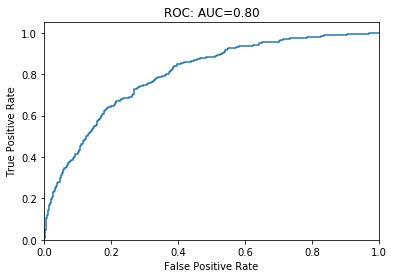

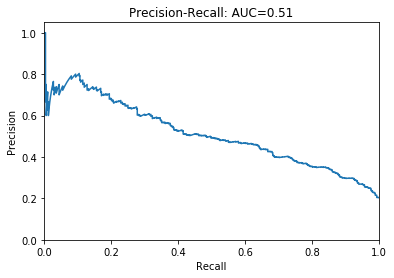

In [269]:
plot_roc_curve(valid[1], y_pred)
plot_pr_curve(valid[1], y_pred)

In [270]:
dt_valid

NameError: name 'dt_valid' is not defined

In [300]:
metrics_dt(m, {"train": (train[0], train[1]), 
               "valid": (valid[0], valid[1]), 
               "test": (test[0], test[1])})

2017-05-14 21:50:40,786 [INFO] Evaluate...
2017-05-14 21:50:43,281 [INFO] Evaluate...
2017-05-14 21:50:44,644 [INFO] Evaluate...


,dataset,loss,acc,auc,auprc
0,valid,0.3776,0.8330,0.8259,0.5935
1,test,0.3503,0.8556,0.8601,0.6744
2,train,0.2863,0.8729,0.9274,0.8052


In [301]:
valid[1].mean()

0.20042918454935621

In [307]:
test[1].shape

(3393, 1)

In [293]:
metrics_dt(m, {"train": (train[0], train[1]), 
               "valid": (valid[0], valid[1]), 
               "test": (test[0], test[1])})

2017-05-14 21:47:31,024 [INFO] Evaluate...
2017-05-14 21:47:33,482 [INFO] Evaluate...
2017-05-14 21:47:34,825 [INFO] Evaluate...


,dataset,loss,acc,auc,auprc
0,valid,0.3803,0.8489,0.8272,0.6269
1,test,0.3588,0.8556,0.8614,0.6869
2,train,0.2977,0.8666,0.9190,0.7865


In [158]:
from concise.hyopt import eval_model

In [274]:
eval_model(m, (train[0]["seq"], np.zeros_like(train[1])), {})

2017-05-13 15:07:35,333 [INFO] Evaluate...


{'acc': 0.78199371351594071, 'loss': 0.53111041213131083}

In [273]:
m.evaluate(train[0]["seq"], train[1], verbose=0, batch_size=1000)

[0.51310163051170998, 0.80444545038195003]

In [48]:
cem.(valid[1], y_pred)

AttributeError: module 'concise.eval_metrics' has no attribute 'fdr'

In [49]:
dir(cm)

NameError: name 'cm' is not defined

In [272]:
cem.auc(valid[1], m.predict(valid[0]["seq"]))

0.79363716507992332

In [53]:
import keras.backend as K

In [57]:
[K.eval(x) for x in cm.contingency_table(valid[1], y_pred)]

[325.0, 2042.0, 303.0, 266.0]

In [66]:
K.eval(cm.f1(valid[1], y_pred))

0.53322393

In [60]:
cm.

<module 'concise.evaluation' from '/opt/modules/i12g/anaconda/3-4.1.1/envs/gpu-tensorflow/lib/python3.5/site-packages/concise/evaluation.py'>

In [18]:
train[1].mean()

0.20835204310731925